<img src="https://electronaut.info/wp-content/uploads/2017/05/Tubescape_jupyter2.jpg">

<h1><font color = b30000>TUBE DATA MATCHER for uTRACER FILES</font></h1><h5>Anode current for a sweep of grid voltages  when anode voltage = constant</h5>


# STEP 1 — Import and process tube data, build dataframe.

In [1]:
from ElectronauTracer_Importer import *
df.head()

Please enter the path to the folder containing the uTracer files: /Users/rrmc/Desktop/tube_scratchFolder/available

What type of tubes are these? 5749

— — — — — 

Data from 212 tubes of type 5749 was successfully read.
A dataframe containing all 212 tubes was successfully created.


,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,198,5749,325,95.683,61.076,41.02,30.853,24.037,18.882,14.949,11.944,9.677,7.98,6.698,5.718,5.018
1,201,5749,325,61.619,38.735,25.431,19.238,14.687,11.189,8.626,6.769,5.411,4.438,3.757,3.28,2.933
2,347,5749,325,65.111,43.414,29.137,21.663,16.397,12.524,9.658,7.595,6.14,5.172,4.493,3.972,3.553
3,348,5749,325,67.248,40.532,25.041,18.289,13.792,10.418,7.935,6.123,4.812,3.877,3.237,2.8,2.479
4,349,5749,325,98.837,62.89,41.576,30.826,23.827,18.645,14.735,11.766,9.509,7.783,6.504,5.534,4.811



# STEP 2: Show the statistics of the tube data set

In [2]:
# For some reason, .describe is requiring .astype(float) in order to show the stats.
df_stats = df.astype(float).describe()
df_stats.loc[:, 'tube_type'] = df_stats.loc[:, 'tube_type'].astype(int)
df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(int)
df_stats

,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
count,212,212,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,485,5749,325.0,78.446476,50.703939,33.720146,25.074373,19.146274,14.719840,11.417759,8.966028,7.168764,5.870877,4.921665,4.199873,3.651627
std,76,0,0.0,11.331693,6.954115,4.758002,3.606212,2.935605,2.478715,2.135324,1.856265,1.612178,1.391347,1.193395,1.026042,0.898530
min,198,5749,325.0,40.505000,28.479000,18.655000,14.365000,11.489000,8.992000,6.581000,4.867000,3.731000,3.051000,2.628000,2.271000,1.945000
25%,434,5749,325.0,70.575500,45.885250,30.892250,23.043750,17.537500,13.340000,10.177250,7.893750,6.293500,5.165250,4.278500,3.662000,3.139500
50%,493,5749,325.0,79.405500,51.573500,34.068500,25.180000,19.084000,14.630000,11.199500,8.781500,6.981500,5.740500,4.797500,4.081000,3.522000
75%,547,5749,325.0,87.349500,56.091000,36.986250,27.319750,20.966000,16.255000,12.558500,9.918750,8.037000,6.563500,5.558000,4.724750,4.102000
max,601,5749,325.0,108.434000,72.369000,51.892000,41.190000,33.994000,28.317000,23.830000,20.269000,17.380000,14.999000,13.004000,11.294000,9.931000


# STEP 3: Plot a graph of all tubes


In [3]:
# Plot a line graph of all tubes

from bokeh.plotting import figure, output_file, show

output_file("Tube_Batch_Statistics.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df_stats.columns)
stats_columns = []
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

# Add all rows of tubes
for i in range(len(df.index)):
    row = df.iloc[i]
    row = list(row)
    row = row[3:]
    p.line(x_values, row, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 4: Show the distribution of a single bias voltage


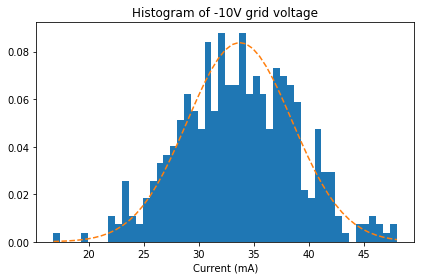

In [4]:
# Histogram of a single column

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

sigma = df_stats.iat[2, 5]
mu = df_stats.iat[1, 5]
x = mu + sigma  * np.random.randn(437)
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Current (mA)')
# ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of -10V grid voltage')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# STEP 5: Calculate the differences between all tubes

In [5]:
from ipywidgets import FloatProgress
from IPython.display import display
import time

start_time = time.time() 

def build_difference_df(df, df_stats):
    
    # Display a progress bar
    build_diff_progress_bar = FloatProgress(min=0, max=100)
    display(build_diff_progress_bar)
       
    # Make a list of all the columns in the dataframe
    cols = list(df.columns)
    
    # Make a list of just the bias columns (*** Should re-write this as a list comprehension)    
    bias_list = []
    for i in cols:
        if i.startswith('Bias_') == True:
            bias_list.append(i)
    
    # Make an empty list to hold the calculated values, to be used to build the difference dataframe
    diff_squared_list = []
    
    # Iterate through the index of tubes in the master dataframe to select a reference tube
    for each_ref_tube in df.index:
        
        # Get the next reference tube data, as a series
        ref_tube = df.iloc[each_ref_tube]
        ref_tube_ID = ref_tube.tube_ID

        # Iterate through the index of tubes in the master dataframe to select a match tube
        for each_match_tube in df.index:
            
            # Get the next tube data to be compared, as a series
            match_tube = df.iloc[each_match_tube]
            match_tube_ID = match_tube.tube_ID
            
            # Dictionary container to hold the difference variables for each tube
            temp_dict = {}
            
            # Compute the squares of the differences in each current measurement
            error_sum = 0
            for bias in enumerate(bias_list):
                mismatch = ((float(match_tube.loc[bias[1]]) - float(ref_tube.loc[bias[1]]))**2)
                temp_dict[bias[1]] = mismatch
                error_sum = error_sum + mismatch

            # Add other relevant key/value pairs to the dictionary  
            temp_dict['ref_tube_ID'] = ref_tube_ID
            temp_dict['match_tube_ID'] = match_tube_ID
            temp_dict['error_sum'] = error_sum

            # Append the tube's calculated values to the diff_squared_list
            diff_squared_list.append(temp_dict)
            
            # Update the progress bar
            build_diff_progress_bar.value += 1

    
    # Make an ordered list for the columns of the new difference dataframe
    new_cols_to_add = ['ref_tube_ID', 'match_tube_ID', 'error_sum']
    df_dif_cols = new_cols_to_add + bias_list
    df_dif = pd.DataFrame(diff_squared_list, columns = df_dif_cols)

    return df_dif
    
    
df_dif = build_difference_df(df, df_stats)

# Produce a brief report:
total_rows = len(df_dif)
total_columns = len(df_dif.columns)
total_datapoints = total_rows * total_columns
stop_time = time.time()
elapsed_time = stop_time - start_time
print("It took", round(elapsed_time, 2), "seconds to calculate", 
      total_datapoints, "values, resulting in", len(df_dif), "rows.")

# Display the head of the difference dataframe
df_dif.head()

FloatProgress(value=0.0)

It took 39.25 seconds to calculate 719104 values, resulting in 44944 rows.


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,198,198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,198,201,2300.452296,1160.356096,499.120281,243.016921,134.908225,87.422500,59.182249,39.980329,26.780625,18.198756,12.545764,8.649481,5.943844,4.347225
2,198,347,1648.409462,934.647184,311.946244,141.205689,84.456100,58.369600,40.424164,27.994681,18.913801,12.510369,7.884864,4.862025,3.048516,2.146225
3,198,348,1970.909856,808.549225,422.055936,255.328441,157.854096,104.960025,71.639296,49.196196,33.884041,23.668225,16.834609,11.978521,8.514724,6.446521
4,198,349,13.907300,9.947716,3.290596,0.309136,0.000729,0.044100,0.056169,0.045796,0.031684,0.028224,0.038809,0.037636,0.033856,0.042849


# STEP 6: Find the best matches for a particular tube_ID

In [16]:
# This function requires the tube_to_match and tube_set_size variable to be set manually, below.

def find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size):
    tube_to_match = str(tube_to_match)
    
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif[(df_dif.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(tube_set_size)
    
    return df_tube_set

tube_to_match = 545
tube_set_size = 2
df_tube_set = find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size)
df_tube_set.head(tube_set_size)


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
33228,545,545,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
33261,545,579,0.38925,0.073441,0.041616,0.001156,0.066049,0.073984,0.045369,0.026244,0.022801,0.016641,0.012544,0.0049,0.001369,0.003136


# STEP 7:  Build a dataframe of the best matched sets in order

In [8]:
# math lib used for generating ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
import math

# Make a local version of df_dif that can be butchered
df_dif_copy = df_dif.copy()

def ask_tube_set_size():
    
    # Ask the user to enter the set size
    tube_set_size = input("Please enter the number of tubes per matched set:")
    
    # Build a list of tube names for the tube set size
    tube_sets_columns = ['Tube_' + str(1 + i) for i in range(int(tube_set_size))]    
    
    return tube_set_size, tube_sets_columns 


def find_best_set_for_chosen_tube_ID(df_dif_copy, tube_to_match, tube_set_size, tube_sets_columns):
    tube_to_match = str(tube_to_match)
        
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif_copy[(df_dif_copy.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(int(tube_set_size))
        
    # Create the dictionary of the tubes in the set and the total score of the set
    tube_set_list = list(df_tube_set.match_tube_ID)
    tube_set_dict = dict(zip(tube_sets_columns, tube_set_list))   
    tube_set_score = df_tube_set.error_sum.sum()
    tube_set_dict.update({'tube_set_score':tube_set_score})

    return tube_set_dict


def find_best_set(df_dif_copy, tube_set_size, tube_sets_columns):
    
    # Make an empty list to hold the tube sets and their scores
    tube_sets_and_scores_list = []
    temp_dict = {}
    
    if 'tube_set_score' in tube_sets_columns:
        tube_sets_columns.remove('tube_set_score')

    for i in df_dif_copy.ref_tube_ID.unique():
        temp_dict = find_best_set_for_chosen_tube_ID(df_dif_copy, i, tube_set_size, tube_sets_columns)
        tube_sets_and_scores_list.append(temp_dict)

    # Add 'tube_set_score' column name at the front of the list
    if 'tube_set_score' not in tube_sets_columns: 
        tube_sets_columns.insert(0, 'tube_set_score')    
    
    # Create a dataframe for the tube sets called df_tube_sets 
    df_tube_sets = pd.DataFrame(tube_sets_and_scores_list, columns=tube_sets_columns)
    
    # Sort the tube_set_score column, take the top row (with the lowest score) as a new df 
    df_best_set_temp = df_tube_sets.sort_values('tube_set_score').head(1)
        
    return df_best_set_temp
 
    
# Start a timer
start_time = time.time()   
    
# Make an empty dataframe to hold all the sets and their scores
df_best_tube_sets = pd.DataFrame()

# Get the tube_set_size and the tube_sets_columns from the ask_tube_set_size function
tube_set_size, tube_sets_columns = ask_tube_set_size()

# Get the best tube set from the batch
df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns) 

# Display a progress bar
progress_bar_range = int(len(df)/int(tube_set_size))
best_matched_progress_bar = FloatProgress(min=0, max=progress_bar_range)
display(best_matched_progress_bar)

# Append the best tube set to the df_best_tube_sets dataframe
df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

# Remove the best tube set from df_dif_copy
tube_delete_list = list(df_best_set_temp.iloc[0])
tube_delete_list.pop(0)
df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]

# A function to generate ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
ordinal_list = [ordinal(n) for n in range(1, int(len(df)))]

set_count = 1
print()
print("*** BEST! ***")
print(ordinal_list[0],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
print("TUBES:", tube_delete_list)

# Update the progress bar
best_matched_progress_bar.value += 1


while len(df_dif_copy.ref_tube_ID.unique()) >= int(tube_set_size):

    # Get all the rest of the sets from the batch
    df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns)
    
    # Append the best tube set to the df_best_tube_sets dataframe
    df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

    # Remove the best tube set from df_dif_copy
    tube_delete_list = list(df_best_set_temp.iloc[0])
    tube_delete_list.pop(0)

    df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
    df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]
    print()
    print(ordinal_list[set_count],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
    print("TUBES:", tube_delete_list)

    set_count += 1
    
    # Update the progress bar
    best_matched_progress_bar.value += 1


stop_time = time.time()
elapsed_time = stop_time - start_time
print()
print("It took", round(elapsed_time, 2), "seconds to produce", set_count, "tube sets.")

best_set = list(df_best_tube_sets.iloc[0])[1:]
worst_set = df_best_tube_sets.tail(1)
worst_set = list(worst_set.iloc[0])[1:]

Please enter the number of tubes per matched set:8


FloatProgress(value=0.0, max=26.0)


*** BEST! ***
1st best tube set SCORE: 6.434326
TUBES: ['465', '420', '551', '446', '406', '579', '554', '545']

2nd best tube set SCORE: 7.204704
TUBES: ['424', '442', '504', '428', '400', '503', '510', '380']

3rd best tube set SCORE: 10.21627
TUBES: ['381', '460', '515', '469', '384', '517', '458', '573']

4th best tube set SCORE: 10.260919
TUBES: ['524', '530', '468', '478', '471', '398', '356', '496']

5th best tube set SCORE: 12.559255
TUBES: ['364', '464', '452', '445', '509', '550', '494', '370']

6th best tube set SCORE: 12.574006
TUBES: ['583', '506', '574', '377', '571', '417', '472', '481']

7th best tube set SCORE: 13.995343
TUBES: ['498', '480', '557', '514', '449', '482', '448', '539']

8th best tube set SCORE: 17.601886
TUBES: ['529', '531', '594', '405', '450', '418', '599', '569']

9th best tube set SCORE: 18.387082
TUBES: ['528', '402', '421', '435', '477', '585', '389', '598']

10th best tube set SCORE: 19.790877
TUBES: ['385', '386', '513', '457', '512', '361', '3

In [ ]:
# Display the matched tube sets as a dataframe
df_best_tube_sets.sort_values('tube_set_score').head(15)

# STEP 8: Plot a line graph of the best set


In [9]:
# Plot a line graph of the best set

from bokeh.plotting import figure, output_file, show

output_file("Best Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(best_set)):
    row = df[df['tube_ID'] == best_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 9: Plot a line graph of the worst set


In [10]:
# Plot a line graph of the worst set

from bokeh.plotting import figure, output_file, show

output_file("Worst Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(worst_set)):
    row = df[df['tube_ID'] == worst_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

### Everything below this line is experimental

In [ ]:
df_best_tube_sets.tube_set_score[:15].describe()


In [ ]:
import seaborn as sns
sns.set()

df_sns = df_best_tube_sets[['tube_set_score']][:15].copy()

sns.pairplot(df_sns, 'tube_set_score')
sns.plt.show()


In [ ]:
from bokeh.charts import Histogram, output_file, show

p = Histogram(df_best_tube_sets['tube_set_score'], title="Tube Set Scores")

output_file("histogram.html",)

show(p)

# Other Miscellaneous stuff

##### Apply a function to a column
df.Bias_2.max()

In [ ]:
% lsmagic

In [ ]:
%pprint



In [ ]:
# Applymap is useful for applying a function to all data
# For example, converting all data from floats to ints
# df.loc[2:7, 'Bias_2': 'Bias_50'].applymap(int)

In [ ]:
# List all available magics
% lsmagic

In [ ]:
# Display environmental variables
env_variables = %env
current_path = env_variables.get('PATH')
current_path

In [ ]:
mydict = % env
mydict.keys()

In [ ]:
% env

In [ ]:
# % time x = range(10000)
% timeit x = range(10000)
max(x)